#Execice 3 Fuchs Jean-Luc Test du 17.10.2018

## Importer les outils





In [0]:
#vecteur et algèbre linéaire
import numpy as np

#les outils pour visualiser
import matplotlib.pyplot as plt

#le solveur
import scipy.integrate as solveur

## Définir les constante du problème


In [0]:
k1 = 0.25 #mol/L*min
k2 = 0.1  #mol/L*min
k3 = 5.0  #L/(mol*min)
V = 50#L
Vdot = 10  #L/min
Ca0 = 1.5  #mol/L
Cb0 = 2  #mol/L
Cc0 = 0  #mol/L
Cd0 = 0  #mol/L
Ce0 = 0  #mol/L
Cf0 = 0  #mol/L


## Définir les équations à résoudre

In [0]:
def equation(variables, t, k1, k2, k3, V):    #en première position c'est la variable au numérateur en fonction du dénominateur (ici dy/dt)
    Ca, Cb, Cc, Cd, Ce, Cf  = variables   #écrire aussi: x, y = variables
       
    
    r1 = k1 * Ca * Cb
    r2 = k2 * Ca * Cd
    r3 = k3 * Cb * Cb * Cc
    
    Ra = -r1-3*r2
    Rb = -2*r1-r3
    Rc = r1 + r2 - 2*r3
    Rd = r1-2*r2+r3
    Re = r2
    Rf = r3
    
    dCadt = Ra
    dCbdt = Rb
    dCcdt = Rc
    dCddt = Rd
    dCedt = Re
    dCfdt = Rf
    
    return dCadt, dCbdt, dCcdt, dCddt, dCedt, dCfdt              #d'abord on calcule dydt et ensuite on renvoit pour dire qu'il a terminé

## Définir les conditions initiales

In [0]:
conditions_initiales = [Ca0, Cb0,Cc0, Cd0, Ce0, Cf0]    # c'est une liste car si plusieurs conditions initiales alors liste plus longue

## Résoudre le problème à l'aide du solveur

In [58]:
conditions_initiales

[1.5, 2, 0, 0, 0, 0]

In [0]:
t = np.linspace(0, 5, 601)   #ici on définit les bornes d'intégration

resultats = solveur.odeint(
    equation,
    conditions_initiales,
    t,
    ( k1, k2, k3,V)
)            

In [0]:
Ca = resultats[:,0]
Ca0 = Ca0

In [0]:
X = (Na0 - Na)/Na0  #calcul taux de conversion

In [0]:
Cc = resultats [:,2]

## Visualiser les résultats

<function matplotlib.pyplot.show>

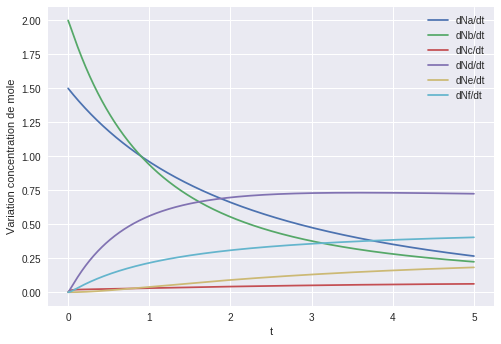

In [63]:

plt.plot(t, resultats)
plt.xlabel('t')
plt.ylabel('Variation concentration de mole')
plt.legend(['dNa/dt', 'dNb/dt', 'dNc/dt', 'dNd/dt', 'dNe/dt', 'dNf/dt'])
plt.show

<function matplotlib.pyplot.show>

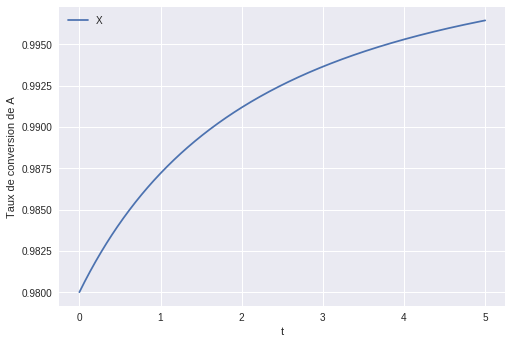

In [64]:
plt.plot(t, X)
plt.xlabel('t')
plt.ylabel('Taux de conversion de A')
plt.legend(['X'])
plt.show

In [67]:
Ca [t>=5] [0]  #taux de conversion après 400 secondes

0.2659401319344847

In [70]:
Cc [t>=5][0]

0.061422168191249266